Saad Ahmed Jamal

e2107235

Assignmnent 2 - Oil Palm Detection in Planet Images using Deep Learning

Submitted to: Dr Charlotte Pelletier

Dated: 18/01/2023

## **Deep Learning Assignment**

### **Content of Notebook**


- Introduction 
- Data Loading
- Exploratory Data Analysis and Data Visualization
- Use of Machine Learning Algorithms for initial reference
- DataLoaders for Deep Models
- Preprocessing
- Training of Deep Learning Models
- Selection of Best Model based on performance
- Test Data Loading
- Prediction of Unknown Dataset
- Comparison of Machine and Deep Learning Models






*Introduction*

For this assignment, we needed to train a deep learning model able to detect oil palm plantation in Planet images. This was a binary classification task where label 0 means there is no oil palm plantation in the image, and 1 indicates the presence of an oil palm plantation.

Each image has a 3 meter spatial resolution, has 3 channels (RGB) and a size of 256 × 256 pixels.

We had access only to the train set, and a hidden independent test set will be used to evaluate your final classification performance (average F-Score).

The dataset has been collected from Kaggle, and was proposed in the Women in Data Science Datathon 2019.


In [263]:
# Loading important libraries
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
from torch.utils.data import random_split
from torch import nn
from torch import optim
import os, shutil, random
import json
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc    
from PIL import Image
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data.sampler import SubsetRandomSampler
from torch.optim import lr_scheduler
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
from torchvision import datasets, transforms, models
import cv2
import pandas as pd
import rasterio


import ipywidgets as widgets

widgets.FloatProgress(
    value=9.5,
    min=0,
    max=10.0,
    description='Loading:',
    bar_style='info',
    style={'bar_color': 'green'},
    orientation='horizontal'
)


FloatProgress(value=9.5, bar_style='info', description='Loading:', max=10.0, style=ProgressStyle(bar_color='gr…

Data Loading

In [223]:
# Setting up path for files
project_dir="C:/Users/saada/Desktop/Drive/UBS/DeepLearning/Assignment_DL"
project_path=project_dir
train_dir = r"C:\Users\saada\Desktop\Drive\UBS\DeepLearning\Assignment_DL\train"
labels_dir = "C:/Users/saada/Desktop/Drive/UBS/DeepLearning/Assignment_DL/traindata.csv"


In [331]:
train_df = pd.read_csv(os.path.join(project_path, "traindata.csv"))
train_df.head()

,img_id,has_oilpalm
0,train/img_0000.jpg,0
1,train/img_0001.jpg,0
2,train/img_0002.jpg,0
3,train/img_0003.jpg,0
4,train/img_0004.jpg,0


In [225]:
train_df['Image_path'] = [os.path.join(project_dir,img) for img in train_df['img_id']]

Exploratory Data Analysis and Data Visualization

In [332]:
import rasterio
N = 500

#-- Getting the training dataset (X,y)
X = np.zeros((N,256*256*3), dtype=np.uint16)
y = np.zeros((N,), dtype=np.uint8)
train_rf_model = train_df.sample(n=N)
for n in range(N):
  X[n,:] = rasterio.open(os.path.join(project_dir,train_rf_model.iloc[n]['img_id'])).read().flatten()
  y[n] = train_rf_model.iloc[n]['has_oilpalm']

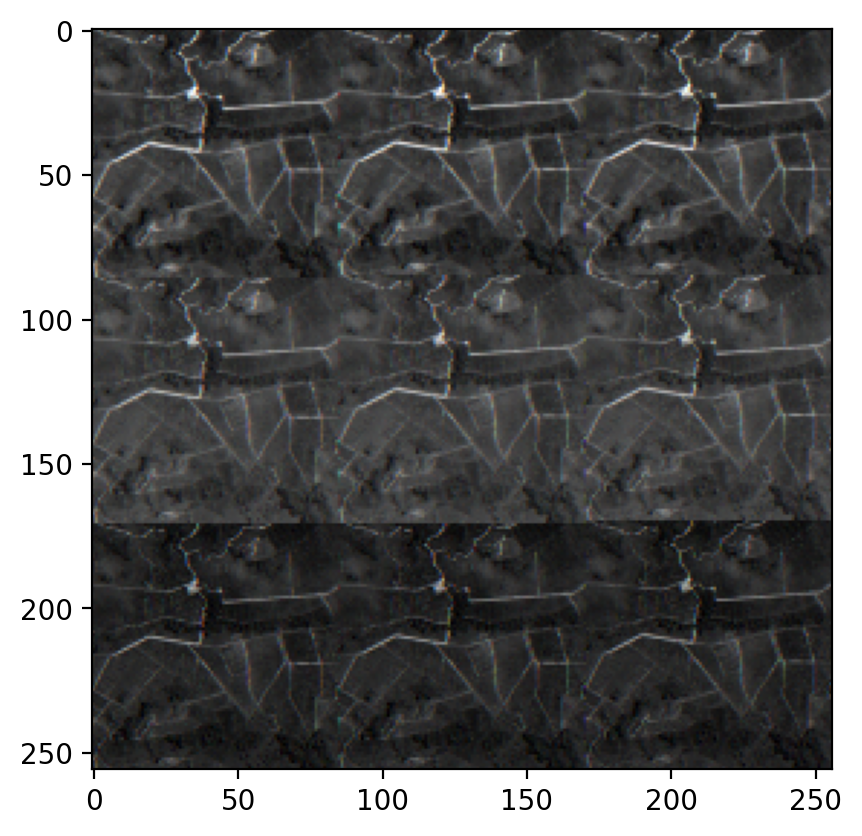

In [8]:
plt.imshow(X[0].reshape(256, 256, 3))

In [333]:
#-- Training a RF model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features=100, max_depth=25, oob_score=True, n_jobs=-1)
rf.fit(X,y)
print('OOB error: ', rf.oob_score_)

OOB error:  0.852


In [270]:
#-- Training a RF model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


dt = DecisionTreeClassifier( max_features=100, max_depth=25)
print(X.shape)
dt.fit(X,y)
print('Accuracy error: ', accuracy_score(y,dt.predict(X)))

(500, 196608)
Accuracy error:  0.882


In [269]:
print('F1_score: ', f1_score(y,dt.predict(X)))

F1_score:  0.0


In [142]:
sklearn.metrics.f1_score(y,dt.predict(X))

1.0

#### Initial Results:
Predictions on test set given by Random Forest (image with oil palm or not)

In [177]:
dt.predict(X)

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,

##### Preprocessing:

In [11]:
# Number of features for class 1
len(train_df[(train_df['has_oilpalm'] == 1)])

944

(array([6650.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         944.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

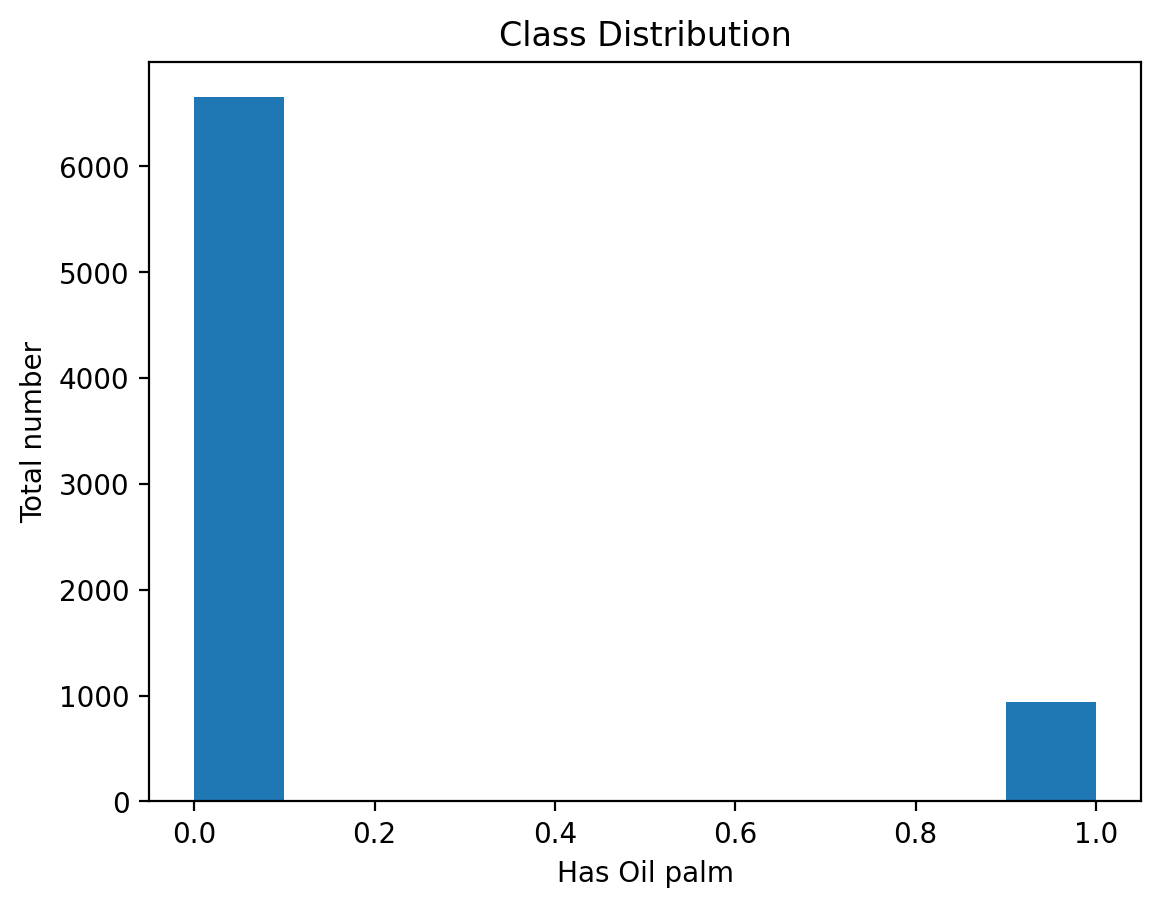

In [85]:
plt.title("Class Distribution")
plt.xlabel('Has Oil palm')
plt.ylabel('Total number')
plt.hist(df.has_oilpalm)

### Comment:
From the above, histogram it is very clear that most of the images donot contain oil palm. To be precise only <b>944</b> images have oil palm out of 7594.

#### Class Imbalance:
To reduce the class imbalance problem, we are going to create repeat the oil palm images for training. 

In [90]:
(train_df[(train_df['has_oilpalm'] == 1)])

,img_id,has_oilpalm,Image_path
29,train/img_0029.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
35,train/img_0035.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
38,train/img_0038.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
41,train/img_0041.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
67,train/img_0067.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
...,...,...,...
7440,train/img_7440.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
7473,train/img_7473.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
7490,train/img_7490.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
7532,train/img_7532.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...


In [226]:
ol=(train_df[(train_df['has_oilpalm'] == 1)])
oil_palm = pd.concat([ol,ol,ol,ol,ol,ol])


In [227]:
oil_palm.reset_index(drop=True)

,img_id,has_oilpalm,Image_path
0,train/img_0029.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
1,train/img_0035.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
2,train/img_0038.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
3,train/img_0041.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
4,train/img_0067.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
...,...,...,...
5659,train/img_7440.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
5660,train/img_7473.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
5661,train/img_7490.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
5662,train/img_7532.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...


In [228]:
# Creating updated samples
updated_sample=pd.concat([oil_palm, (train_df[(train_df['has_oilpalm'] == 0)])]).reset_index(drop=True)
print(len(updated_sample))

12314


(array([6650.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5664.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

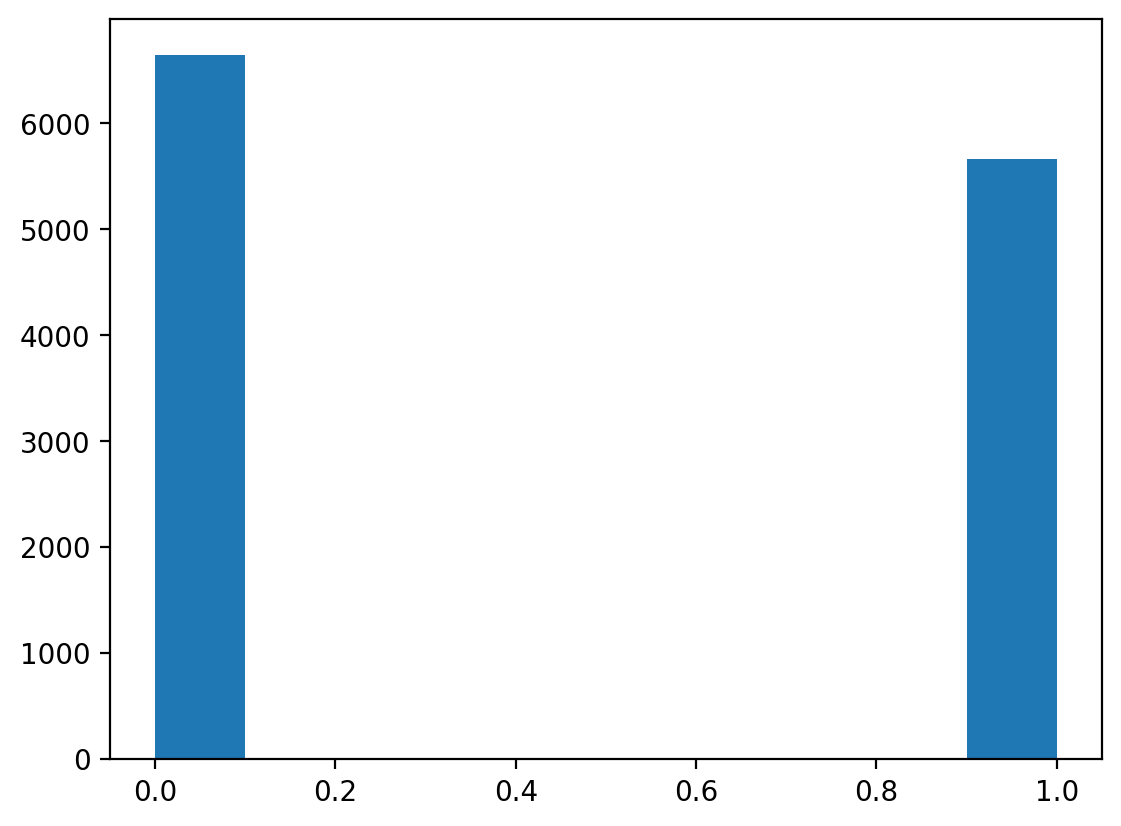

In [30]:
plt.hist(updated_sample['has_oilpalm'])

``` Now there are comparable number of samples. ```

In [26]:
updated_sample

,img_id,has_oilpalm,Image_path
0,train/img_0029.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
1,train/img_0035.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
2,train/img_0038.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
3,train/img_0041.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
4,train/img_0067.jpg,1,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
...,...,...,...
7589,train/img_7588.jpg,0,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
7590,train/img_7589.jpg,0,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
7591,train/img_7591.jpg,0,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...
7592,train/img_7592.jpg,0,C:/Users/saada/Desktop/Drive/UBS/DeepLearning/...


```
Though, There are several techniques to solve the imbalance class problem in machine learning, including:

Resampling the dataset: This includes oversampling the minority class or undersampling the majority class.

Using different evaluation metrics: Instead of using accuracy, other metrics like precision, recall, F1-score, or area under the ROC curve can be used to evaluate the performance of the model.

Using different algorithms: Some algorithms like decision trees and random forests are less sensitive to class imbalance than others like logistic regression.

Cost-sensitive learning: Assign different misclassification costs to different classes during training.

Ensemble methods: Bagging and boosting can be used to combine multiple models and reduce the impact of class imbalance.

Generative Adversarial Networks (GANs) to generate synthetic samples of the minority class.

Using penalized models: Some models like SVM have a parameter for class weight which can be used to handle class imbalance.
    
Over here, I used the first one that is resampling the dataset.
```

In [230]:
# Train Test split
train_sample, test_sample = train_test_split(updated_sample, test_size=0.3)
train_sample.reset_index(drop=True);
test_sample.reset_index(drop=True);

# Validation split
valid_sample = train_sample.sample(frac=0.3, random_state=1)
valid_sample.reset_index(drop=True);
print('train_set\'s, validation_set\'s and test_set\'s length are: \n{}\n{}\n{}'. format(len(train_sample), len(valid_sample), len(test_sample)))

train_set's, validation_set's and test_set's length are: 
8619
2586
3695


In [ ]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet18
        """
        model_ft = models.resnet18(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        """ Densenet
        """
        model_ft = models.densenet121(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes) 
        input_size = 224

    elif model_name == "inception":
        """ Inception v3 
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        model_ft = models.inception_v3(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # Handle the auxilary net
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
        # Handle the primary net
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs,num_classes)
        input_size = 299

    else:
        print("Invalid model name, exiting...")
        exit()
    
    return model_ft, input_size

###### Data Loader



In [231]:
class DataLoader:
    def __init__(self, dataframe, img_path, transform=None):
        
        self.transforms = transform
        self.img_path = img_path
        self.data = dataframe
        self.images = self.data["Image_path"]
        self.labels = self.data["has_oilpalm"]
        self.classes = set(self.labels)
        self.num_classes = len(self.classes)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        img_path = self.images.iloc[index]
        img = Image.open(img_path)
        if self.transforms:
            img = self.transforms(img)
        label = self.labels.iloc[index]
        sample = {'image': img, 'label': int(label)}
        
        return sample

In [232]:
import warnings
warnings.simplefilter("ignore", UserWarning)

Normalize = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

data_transforms= {
    
                 "training": transforms.Compose([transforms.RandomSizedCrop(224),
                                                   transforms.ToTensor(),
                                                   Normalize]),

                 "validation": transforms.Compose([transforms.Scale(256),
                                                   transforms.CenterCrop(224),      
                                                   transforms.ToTensor(),
                                                   Normalize]),
                  "testing": transforms.Compose([transforms.Scale(256),
                                                   transforms.CenterCrop(224),      
                                                   transforms.ToTensor(),
                                                   Normalize]),
                 }

In [233]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(4, 5))
    else:
        fig, ax = plt.subplots(figsize=ax)
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    ax.set_title("{}".format(title))
    ax.grid(False)
    plt.axis('off')
    ax.imshow(image)
    
    return ax

In [234]:
image_datasets = {'train_dataset':DataLoader(dataframe=train_sample, img_path=train_dir, transform=data_transforms['training']),
                  'valid_dataset':DataLoader(dataframe=valid_sample, img_path=train_dir, transform=data_transforms['validation']),
                  'test_dataset':DataLoader(dataframe=test_sample, img_path=train_dir, transform=data_transforms['testing'])}

batch_size = 20
dataloaders = {"train": torch.utils.data.DataLoader(image_datasets["train_dataset"], batch_size = batch_size, shuffle=True),
               "valid": torch.utils.data.DataLoader(image_datasets["valid_dataset"], batch_size = batch_size, shuffle=True),
               "test": torch.utils.data.DataLoader(image_datasets["test_dataset"], batch_size = batch_size, shuffle=True)} 

tensor([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0])


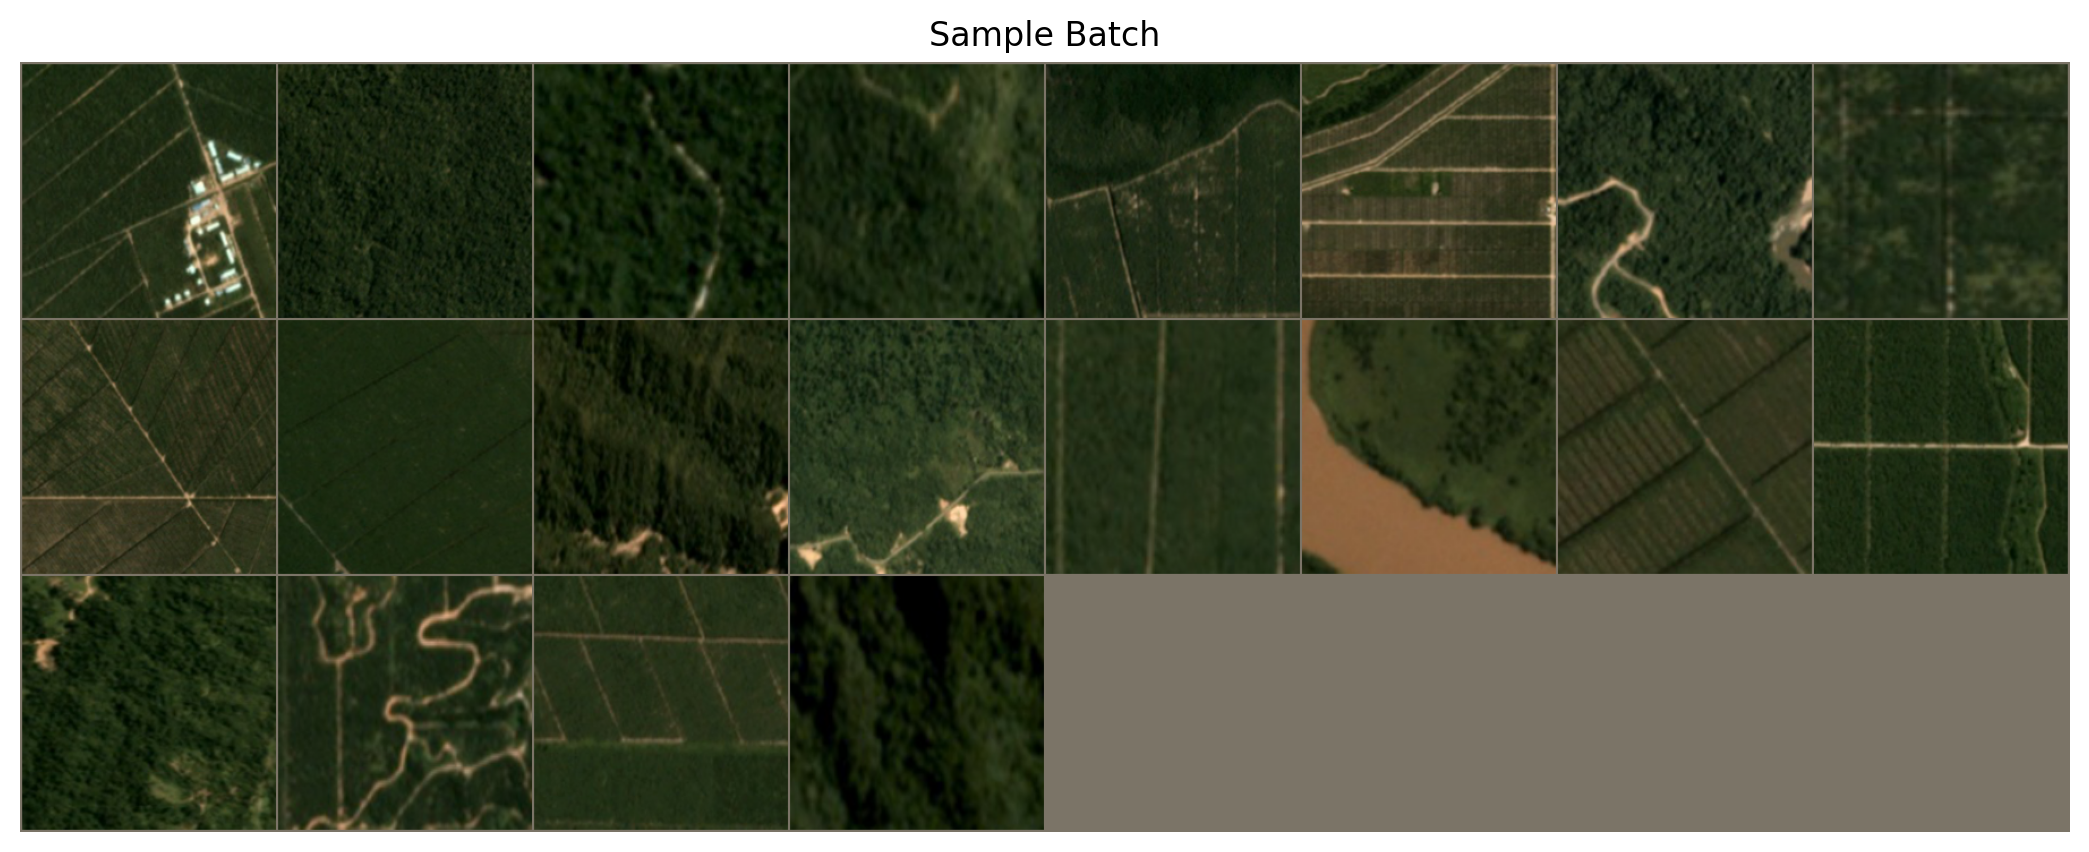

In [243]:
# Visualization of first batch of training sample.
dataiter = iter(dataloaders['train'])
sample_batch = dataiter.next()
imshow(torchvision.utils.make_grid(sample_batch['image']),ax =(18,5), title="Sample Batch")
print(sample_batch['label'])

In [235]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [24]:
print(torch.cuda.memory_cached())
print(torch.cuda.memory_allocated())

C:\Users\saada\anaconda3\envs\pytorch\lib\site-packages\torch\cuda\memory.py:346: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  FutureWarning)


585105408

In [102]:
torch.cuda.empty_cache()

**Model: VGG-19**

In [65]:
# Selecting model
model = models.vgg19(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\saada/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

```
A scheduler in PyTorch is used to adjust the learning rate of the optimizer during training. The learning rate is a hyperparameter that controls the step size at which the optimizer makes updates to the model's parameters. It plays a crucial role in determining the performance of the model, as a high learning rate can result in overshooting the optimal solution, while a low learning rate can cause slow convergence.

Schedulers in PyTorch provide a way to change the learning rate during training, typically by decreasing it over time. This can help the optimizer converge to a better solution by starting with a high learning rate that allows for larger steps, and then decreasing the learning rate as training progresses to make smaller and more precise updates.

There are several built-in schedulers in PyTorch, such as the StepLR, MultiStepLR, ExponentialLR, and CosineAnnealingLR which adjust the learning rate based on the number of steps taken by the optimizer, the number of epochs, a decay factor or a cosine schedule.

Using scheduler can help to improve the performance of the model and speed up the training process.
```

In [27]:
# Cross Entropy loss function and Adam Optimizer with a schedular for adjusting learning rate
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= 1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=80)

In [68]:
# freeze the features layers
for param in model.parameters():
    param.requires_grad = False


classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(25088, 4096)),
    ('relu1', nn.ReLU()),
    ('dropout1', nn.Dropout(p=0.25)),
    ('fc2', nn.Linear(4096, 4096)),
    ('relu2', nn.ReLU()),
    ('dropout2', nn.Dropout(p=0.25)),
    ('output', nn.Linear(4096, 2))
]))

model.classifier = classifier

print(model)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [69]:
model.to(device)

In [26]:
epochs=3
batch_size = 8
check_every =100
# Start clean by setting gradients of all parameters to zero. 
model.zero_grad()

dataset_len = len(dataloaders["train"].batch_sampler)
total_val_images = len(dataloaders["valid"].batch_sampler) * dataloaders["valid"].batch_size

print(f'Using the {device} device to train.')
print(f'Training on {dataset_len} batches of {dataloaders["train"].batch_size}.')
print(f'Average loss and accuracy for epoch every {check_every} batches.')

for e in range(epochs):
    e_loss = 0
    prev_chk = 0
    total = 0
    correct = 0
    print(f'\nEpoch {e+1} of {epochs}\n----------------------------')
    for ii, (image, label) in enumerate(dataloaders["train"]):
        images = sample_batch['image'].to(device)
        labels = sample_batch['label'].to(device)
        
        # Set gradients of all parameters to zero. 
        optimizer.zero_grad()
        outputs = model.forward(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        e_loss += loss.item()
        #accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Keep a running total of loss for
        # this epoch
        itr = (ii + 1)
        if itr % check_every == 0:
            avg_loss = f'avg. loss: {e_loss/itr:.4f}'
            acc = f'accuracy: {(correct/total) * 100:.2f}%'
            print(f'  Batches {prev_chk:03} to {itr:03}: {avg_loss}, {acc}.')
            prev_chk = (ii + 1)
    
    # Validation
    e_valid_correct = 0
    e_valid_total = 0
     # Disabling gradient calculation
    with torch.no_grad():
        for ii, (images, labels) in enumerate(dataloaders["valid"]):
            images = sample_batch['image'].to(device)
            labels = sample_batch['label'].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            e_valid_total += labels.size(0)
            e_valid_correct += (predicted == labels).sum().item()
        print(f"\n\tValidating for epoch {e+1}...")
        correct_perc = 0
        if e_valid_correct > 0:
            correct_perc = (100 * e_valid_correct // e_valid_total)
        print(f'\tAccurately classified {correct_perc:d}% of {total_val_images} images.')

print('Done...')

torch.save(model, 'VGG16.pth')

Using the cuda:0 device to train.
Training on 1078 batches of 8.
Average loss and accuracy for epoch every 100 batches.

Epoch 1 of 3
----------------------------
  Batches 000 to 100: avg. loss: 0.6962, accuracy: 47.75%.
  Batches 100 to 200: avg. loss: 0.6954, accuracy: 49.81%.
  Batches 200 to 300: avg. loss: 0.6956, accuracy: 50.17%.
  Batches 300 to 400: avg. loss: 0.6958, accuracy: 49.28%.
  Batches 400 to 500: avg. loss: 0.6955, accuracy: 49.58%.
  Batches 500 to 600: avg. loss: 0.6954, accuracy: 49.60%.
  Batches 600 to 700: avg. loss: 0.6954, accuracy: 49.38%.
  Batches 700 to 800: avg. loss: 0.6954, accuracy: 49.22%.
  Batches 800 to 900: avg. loss: 0.6954, accuracy: 49.38%.
  Batches 900 to 1000: avg. loss: 0.6954, accuracy: 49.16%.

	Validating for epoch 1...
	Accurately classified 47% of 2592 images.

Epoch 2 of 3
----------------------------
  Batches 000 to 100: avg. loss: 0.6959, accuracy: 50.75%.
  Batches 100 to 200: avg. loss: 0.6957, accuracy: 48.19%.
  Batches 200 

### Tried another approach learned in computer vision module

In [95]:
# Top level data directory. Here we assume the format of the directory conforms 
#   to the ImageFolder structure
#data_dir = "./UCMerced"

# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "squeezenet"

# Number of classes in the dataset
num_classes = 2

# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Number of epochs to train for 
num_epochs = 5

# Flag for feature extracting. When False, we finetune the whole model, 
#   when True we only update the reshaped layer params
feature_extract = True

In [97]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [98]:
#model_name=model
# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

Changing Model parameters decreased the accuracy even more, we will try another model

**Trying ResNet18**

In [43]:
model=models.resnet18(pretrained=False)
# Freezing parameters
for param in model.parameters():
    param.requires_grad = False
#removing classifier 
#classifier = nn.Sequential(*list(model.classifier.children())[:-1])
# replacing it with a custom classifier
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
#loss function
criterion = nn.NLLLoss()

#SGD optimizer
optimizer = optim.Adam(model.fc.parameters(), lr= 1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

In [100]:
model_ft.to(device)
model=model_ft

In [101]:
epochs=3
batch_size = 8
check_every =100
# Start clean by setting gradients of all parameters to zero. 
model.zero_grad()

dataset_len = len(dataloaders["train"].batch_sampler)
total_val_images = len(dataloaders["valid"].batch_sampler) * dataloaders["valid"].batch_size

print(f'Using the {device} device to train.')
print(f'Training on {dataset_len} batches of {dataloaders["train"].batch_size}.')
print(f'Average loss and accuracy for epoch every {check_every} batches.')

for e in range(epochs):
    e_loss = 0
    prev_chk = 0
    total = 0
    correct = 0
    print(f'\nEpoch {e+1} of {epochs}\n----------------------------')
    for ii, (image, label) in enumerate(dataloaders["train"]):
        images = sample_batch['image'].to(device)
        labels = sample_batch['label'].to(device)
        
        # Set gradients of all parameters to zero. 
        optimizer.zero_grad()
        outputs = model.forward(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        e_loss += loss.item()
        #accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Keep a running total of loss for
        # this epoch
        itr = (ii + 1)
        if itr % check_every == 0:
            avg_loss = f'avg. loss: {e_loss/itr:.4f}'
            acc = f'accuracy: {(correct/total) * 100:.2f}%'
            print(f'  Batches {prev_chk:03} to {itr:03}: {avg_loss}, {acc}.')
            prev_chk = (ii + 1)
    
    # Validation
    e_valid_correct = 0
    e_valid_total = 0
     # Disabling gradient calculation
    with torch.no_grad():
        for ii, (images, labels) in enumerate(dataloaders["valid"]):
            images = sample_batch['image'].to(device)
            labels = sample_batch['label'].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            e_valid_total += labels.size(0)
            e_valid_correct += (predicted == labels).sum().item()
        print(f"\n\tValidating for epoch {e+1}...")
        correct_perc = 0
        if e_valid_correct > 0:
            correct_perc = (100 * e_valid_correct // e_valid_total)
        print(f'\tAccurately classified {correct_perc:d}% of {total_val_images} images.')

print('Done...')

torch.save(model, 'resnet18.pth')

Using the cuda:0 device to train.
Training on 1421 batches of 8.
Average loss and accuracy for epoch every 100 batches.

Epoch 1 of 3
----------------------------
  Batches 000 to 100: avg. loss: 1.0728, accuracy: 19.00%.
  Batches 100 to 200: avg. loss: 1.0727, accuracy: 18.81%.
  Batches 200 to 300: avg. loss: 1.0734, accuracy: 18.62%.
  Batches 300 to 400: avg. loss: 1.0723, accuracy: 18.47%.
  Batches 400 to 500: avg. loss: 1.0715, accuracy: 18.65%.
  Batches 500 to 600: avg. loss: 1.0721, accuracy: 18.62%.
  Batches 600 to 700: avg. loss: 1.0721, accuracy: 18.64%.
  Batches 700 to 800: avg. loss: 1.0721, accuracy: 18.36%.
  Batches 800 to 900: avg. loss: 1.0722, accuracy: 18.46%.
  Batches 900 to 1000: avg. loss: 1.0721, accuracy: 18.57%.
  Batches 1000 to 1100: avg. loss: 1.0726, accuracy: 18.51%.
  Batches 1100 to 1200: avg. loss: 1.0724, accuracy: 18.55%.
  Batches 1200 to 1300: avg. loss: 1.0718, accuracy: 18.57%.
  Batches 1300 to 1400: avg. loss: 1.0715, accuracy: 18.54%.

	

In [ ]:
model_ft = "resnet"

In [103]:
# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

model_ft.to(device)
model=model_ft

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [104]:
epochs=3
batch_size = 8
check_every =100
# Start clean by setting gradients of all parameters to zero. 
model.zero_grad()

dataset_len = len(dataloaders["train"].batch_sampler)
total_val_images = len(dataloaders["valid"].batch_sampler) * dataloaders["valid"].batch_size

print(f'Using the {device} device to train.')
print(f'Training on {dataset_len} batches of {dataloaders["train"].batch_size}.')
print(f'Average loss and accuracy for epoch every {check_every} batches.')

for e in range(epochs):
    e_loss = 0
    prev_chk = 0
    total = 0
    correct = 0
    print(f'\nEpoch {e+1} of {epochs}\n----------------------------')
    for ii, (image, label) in enumerate(dataloaders["train"]):
        images = sample_batch['image'].to(device)
        labels = sample_batch['label'].to(device)
        
        # Set gradients of all parameters to zero. 
        optimizer.zero_grad()
        outputs = model.forward(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        e_loss += loss.item()
        #accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Keep a running total of loss for
        # this epoch
        itr = (ii + 1)
        if itr % check_every == 0:
            avg_loss = f'avg. loss: {e_loss/itr:.4f}'
            acc = f'accuracy: {(correct/total) * 100:.2f}%'
            print(f'  Batches {prev_chk:03} to {itr:03}: {avg_loss}, {acc}.')
            prev_chk = (ii + 1)
    
    # Validation
    e_valid_correct = 0
    e_valid_total = 0
    # Disabling gradient calculation
    with torch.no_grad():
        for ii, (images, labels) in enumerate(dataloaders["valid"]):
            images = sample_batch['image'].to(device)
            labels = sample_batch['label'].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            e_valid_total += labels.size(0)
            e_valid_correct += (predicted == labels).sum().item()
        print(f"\n\tValidating for epoch {e+1}...")
        correct_perc = 0
        if e_valid_correct > 0:
            correct_perc = (100 * e_valid_correct // e_valid_total)
        print(f'\tAccurately classified {correct_perc:d}% of {total_val_images} images.')

print('Done...')

torch.save(model, 'resnet18.pth')

Using the cuda:0 device to train.
Training on 1421 batches of 8.
Average loss and accuracy for epoch every 100 batches.

Epoch 1 of 3
----------------------------
  Batches 000 to 100: avg. loss: 1.0473, accuracy: 23.88%.
  Batches 100 to 200: avg. loss: 1.0463, accuracy: 24.31%.
  Batches 200 to 300: avg. loss: 1.0434, accuracy: 23.75%.
  Batches 300 to 400: avg. loss: 1.0419, accuracy: 23.72%.
  Batches 400 to 500: avg. loss: 1.0406, accuracy: 23.45%.
  Batches 500 to 600: avg. loss: 1.0407, accuracy: 23.73%.
  Batches 600 to 700: avg. loss: 1.0400, accuracy: 23.61%.
  Batches 700 to 800: avg. loss: 1.0407, accuracy: 23.66%.
  Batches 800 to 900: avg. loss: 1.0403, accuracy: 23.72%.
  Batches 900 to 1000: avg. loss: 1.0407, accuracy: 23.66%.
  Batches 1000 to 1100: avg. loss: 1.0413, accuracy: 23.55%.
  Batches 1100 to 1200: avg. loss: 1.0409, accuracy: 23.56%.
  Batches 1200 to 1300: avg. loss: 1.0406, accuracy: 23.61%.
  Batches 1300 to 1400: avg. loss: 1.0397, accuracy: 23.60%.

	

#### This approach doesnot seem to work as accuacy is falling really low. So therefore, switching back to previous approach and testing some other models.

##### Model: Resnet50

In [34]:
import torchvision
from torchvision import models
model=models.resnet50(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\saada/.cache\torch\hub\checkpoints\resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [35]:
# Cross Entropy loss function and Adam Optimizer with a schedular for adjusting learning rate
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= 1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=80)


# freeze the features layers
for param in model.parameters():
    param.requires_grad = False


classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(25088, 4096)),
    ('relu1', nn.ReLU()),
    ('dropout1', nn.Dropout(p=0.25)),
    ('fc2', nn.Linear(4096, 4096)),
    ('relu2', nn.ReLU()),
    ('dropout2', nn.Dropout(p=0.25)),
    ('output', nn.Linear(4096, 2))
]))

model.classifier = classifier


fc = nn.Sequential(nn.Linear(in_features=2048, out_features=2, bias=True),nn.LogSoftmax(dim=1))
#Attaching custom classifier to the model
model.fc = fc

print(model)


model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [131]:
epochs=3
batch_size = 8
check_every =100
# Start clean by setting gradients of all parameters to zero. 
model.zero_grad()

dataset_len = len(dataloaders["train"].batch_sampler)
total_val_images = len(dataloaders["valid"].batch_sampler) * dataloaders["valid"].batch_size

print(f'Using the {device} device to train.')
print(f'Training on {dataset_len} batches of {dataloaders["train"].batch_size}.')
print(f'Average loss and accuracy for epoch every {check_every} batches.')

for e in range(epochs):
    e_loss = 0
    prev_chk = 0
    total = 0
    correct = 0
    print(f'\nEpoch {e+1} of {epochs}\n----------------------------')
    for ii, (image, label) in enumerate(dataloaders["train"]):
        images = sample_batch['image'].to(device)
        labels = sample_batch['label'].to(device)
        
        # Set gradients of all parameters to zero. 
        optimizer.zero_grad()
        outputs = model.forward(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        e_loss += loss.item()
        #accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Keep a running total of loss for
        # this epoch
        itr = (ii + 1)
        if itr % check_every == 0:
            avg_loss = f'avg. loss: {e_loss/itr:.4f}'
            acc = f'accuracy: {(correct/total) * 100:.2f}%'
            print(f'  Batches {prev_chk:03} to {itr:03}: {avg_loss}, {acc}.')
            prev_chk = (ii + 1)
    
    # Validation
    e_valid_correct = 0
    e_valid_total = 0
     # Disabling gradient calculation
    with torch.no_grad():
        for ii, (images, labels) in enumerate(dataloaders["valid"]):
            images = sample_batch['image'].to(device)
            labels = sample_batch['label'].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            e_valid_total += labels.size(0)
            e_valid_correct += (predicted == labels).sum().item()
        print(f"\n\tValidating for epoch {e+1}...")
        correct_perc = 0
        if e_valid_correct > 0:
            correct_perc = (100 * e_valid_correct // e_valid_total)
        print(f'\tAccurately classified {correct_perc:d}% of {total_val_images} images.')

print('Done...')

torch.save(model, 'resnet50.pth')

Using the cuda:0 device to train.
Training on 1421 batches of 8.
Average loss and accuracy for epoch every 100 batches.

Epoch 1 of 3
----------------------------
  Batches 000 to 100: avg. loss: 0.3496, accuracy: 85.12%.
  Batches 100 to 200: avg. loss: 0.2491, accuracy: 92.56%.
  Batches 200 to 300: avg. loss: 0.1924, accuracy: 95.04%.
  Batches 300 to 400: avg. loss: 0.1567, accuracy: 96.28%.
  Batches 400 to 500: avg. loss: 0.1322, accuracy: 97.02%.
  Batches 500 to 600: avg. loss: 0.1143, accuracy: 97.52%.
  Batches 600 to 700: avg. loss: 0.1008, accuracy: 97.88%.
  Batches 700 to 800: avg. loss: 0.0901, accuracy: 98.14%.
  Batches 800 to 900: avg. loss: 0.0815, accuracy: 98.35%.
  Batches 900 to 1000: avg. loss: 0.0744, accuracy: 98.51%.
  Batches 1000 to 1100: avg. loss: 0.0684, accuracy: 98.65%.
  Batches 1100 to 1200: avg. loss: 0.0634, accuracy: 98.76%.
  Batches 1200 to 1300: avg. loss: 0.0590, accuracy: 98.86%.
  Batches 1300 to 1400: avg. loss: 0.0552, accuracy: 98.94%.

	

Out of expectations, resenet is giving 100% accuracy while training. 100% accuracy is exceptional. 

Validating it again by again performing the training using different batch size

In [236]:
import torchvision
from torchvision import models
model=models.resnet50(pretrained=False)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [237]:
model = models.resnet50(pretrained=False)
for param in model.parameters():
    param.requires_grad = False

fc = nn.Sequential(nn.Linear(in_features=2048, out_features=2, bias=True),
                nn.LogSoftmax(dim=1))
model.fc = fc

In [238]:
#loss function
criterion = nn.CrossEntropyLoss()
#SGD optimizer
optimizer = optim.Adam(model.fc.parameters(), lr= 1e-4)

In [240]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  
device

device(type='cuda', index=0)

In [241]:
model.to(device);

In [244]:
epochs=3
batch_size = 20
check_every =100
# Start clean by setting gradients of all parameters to zero. 
model.zero_grad()

dataset_len = len(dataloaders["train"].batch_sampler)
total_val_images = len(dataloaders["valid"].batch_sampler) * dataloaders["valid"].batch_size

print(f'Using the {device} device to train.')
print(f'Training on {dataset_len} batches of {dataloaders["train"].batch_size}.')
print(f'Average loss and accuracy for epoch every {check_every} batches.')

for e in range(epochs):
    e_loss = 0
    prev_chk = 0
    total = 0
    correct = 0
    print(f'\nEpoch {e+1} of {epochs}\n----------------------------')
    for ii, (image, label) in enumerate(dataloaders["train"]):
        images = sample_batch['image'].to(device)
        labels = sample_batch['label'].to(device)
        
        # Set gradients of all parameters to zero. 
        optimizer.zero_grad()
        outputs = model.forward(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        e_loss += loss.item()
        #accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Keep a running total of loss for
        # this epoch
        itr = (ii + 1)
        if itr % check_every == 0:
            avg_loss = f'avg. loss: {e_loss/itr:.4f}'
            acc = f'accuracy: {(correct/total) * 100:.2f}%'
            print(f'  Batches {prev_chk:03} to {itr:03}: {avg_loss}, {acc}.')
            prev_chk = (ii + 1)
    
    # Validation
    e_valid_correct = 0
    e_valid_total = 0
     # Disabling gradient calculation
    with torch.no_grad():
        for ii, (images, labels) in enumerate(dataloaders["valid"]):
            images = sample_batch['image'].to(device)
            labels = sample_batch['label'].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            e_valid_total += labels.size(0)
            e_valid_correct += (predicted == labels).sum().item()
        print(f"\n\tValidating for epoch {e+1}...")
        correct_perc = 0
        if e_valid_correct > 0:
            correct_perc = (100 * e_valid_correct // e_valid_total)
        print(f'\tAccurately classified {correct_perc:d}% of {total_val_images} images.')

print('Done...')

torch.save(model, 'resnet50.pth')

Using the cuda:0 device to train.
Training on 431 batches of 20.
Average loss and accuracy for epoch every 100 batches.

Epoch 1 of 3
----------------------------
  Batches 000 to 100: avg. loss: 0.5315, accuracy: 77.20%.
  Batches 100 to 200: avg. loss: 0.4295, accuracy: 86.98%.
  Batches 200 to 300: avg. loss: 0.3574, accuracy: 91.32%.
  Batches 300 to 400: avg. loss: 0.3050, accuracy: 93.49%.

	Validating for epoch 1...
	Accurately classified 100% of 2600 images.

Epoch 2 of 3
----------------------------
  Batches 000 to 100: avg. loss: 0.0982, accuracy: 100.00%.
  Batches 100 to 200: avg. loss: 0.0868, accuracy: 100.00%.
  Batches 200 to 300: avg. loss: 0.0778, accuracy: 100.00%.
  Batches 300 to 400: avg. loss: 0.0705, accuracy: 100.00%.

	Validating for epoch 2...
	Accurately classified 100% of 2600 images.

Epoch 3 of 3
----------------------------
  Batches 000 to 100: avg. loss: 0.0380, accuracy: 100.00%.
  Batches 100 to 200: avg. loss: 0.0351, accuracy: 100.00%.
  Batches 2

 **Checking the Model on test set**

In [261]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
correct = 0
total = 0
total_images = len(dataloaders["test"].batch_sampler) * dataloaders["test"].batch_size

# Disabling gradient calculation
with torch.no_grad():
    for ii, (image, label) in enumerate(dataloaders["test"]):
        images = sample_batch['image'].to(device)
        labels = sample_batch['label'].to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(predicted)
    
    #Generate the confusion matrix
    cf_matrix = confusion_matrix(np.array(labels.cpu()), np.array(predicted.cpu()))
    print('Confusion Matrix',cf_matrix)

    # f1 score
    print('F1 Score: ',f1_score(np.array(labels.cpu()), np.array(predicted.cpu())))


print(f'Accurately classified {(100 * correct // total):d}% of {total_images} images.')

tensor([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0],
       device='cuda:0')
Confusion Matrix [[ 8  0]
 [ 0 12]]
F1 Score:  1.0
Accurately classified 100% of 3700 images.


Resnet50 gives 100% accuracy on the test set as well, which is strange.

In [ ]:
'''
model_list=[]
model_list.append(models.resnet152(pretrained=True))
model_list.append(models.googlenet(pretrained=True))
model_list.append(models.densenet201(pretrained=True))
model_list.append(models.mobilenet_v2(pretrained=True))
model_list.append(models.densenet201(pretrained=True))
'''

## Prediction Phase:



### Now, we are going to predict labels of unknown images

In [303]:
test_list=glob.glob(test_dir+'/*.jpg')
test_list_1=[]
for i in test_list:
    t = i.split('DL\\')[1]
    test_list_1.append(t)
test_df=pd.DataFrame(data=test_list_1,columns=['img_id'])
test_df['Image_path']=test_list

In [304]:
class test_DataLoader:
    def __init__(self, dataframe, img_path, transform=None):
        
        self.transforms = transform
        self.img_path = img_path
        self.data = dataframe
        self.images = self.data["Image_path"]


    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        img_path = self.images.iloc[index]
        img = Image.open(img_path)
        if self.transforms:
            img = self.transforms(img)
        sample = {'image': img,'image_path':img_path}
        
        return sample

In [305]:
new_dataset={'test2_dataset':test_DataLoader(dataframe=test_df, img_path = test_dir, transform=data_transforms['testing'])}


In [306]:
dataloaders_test = {"testing": torch.utils.data.DataLoader(new_dataset['test2_dataset'], batch_size = 1, shuffle=True)}

In [300]:
dataiter_test = iter(dataloaders_test['testing'])
sample_batch_test = dataiter_test.next()

In [302]:
sample_batch_test['image_path']

['C:\\Users\\saada\\Desktop\\Drive\\UBS\\DeepLearning\\Assignment_DL\\test\\img_6997.jpg']

In [307]:
unknownset_predictions=[]
ip_paths=[]
# Set model to evaluation mode
model.eval()
for i in dataloaders_test['testing']:
    dataiter_test = iter(dataloaders_test['testing'])
    sample_batch_test = dataiter_test.next()
    image_test=sample_batch_test['image'].to(device)
    output_test=model(image_test)
    _, predicted = torch.max(output_test, 1)
    print(np.array(predicted.cpu()))
    unknownset_predictions.append(np.array(predicted.cpu()))
    ip_paths.append(sample_batch_test['image_path'])
    

[1]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]


[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[1]


[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]


[1]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[0]


creating a csv file for the predictions similar to the one we had for input labels

In [308]:
unknownset_predictions_1=[]
for i in unknownset_predictions:
    unknownset_predictions_1.append(int(i))

In [326]:
ip_paths_1=[]
for i in ip_paths:
    j=str(i)
    ip_paths_1.append(j.split('_DL')[1][2:-2])

In [328]:
output_df=pd.DataFrame(data=ip_paths_1,columns=['img_id'])
output_df['has_oilpalm']=unknownset_predictions_1
output_df.to_csv('predictions.csv', index=False)

In [329]:
output_df

,img_id,has_oilpalm
0,test\\img_6589.jpg,1
1,test\\img_6975.jpg,0
2,test\\img_2219.jpg,1
3,test\\img_1965.jpg,1
4,test\\img_4062.jpg,1
...,...,...
7632,test\\img_1968.jpg,0
7633,test\\img_6260.jpg,0
7634,test\\img_2500.jpg,0
7635,test\\img_0021.jpg,1


#### The predictions will be tested with hidden labels to find actual test performance of the trained model.

Comparison of Predictions by Trained best performing trained deep neural network with random forest

In [334]:
test_dir = r"C:\Users\saada\Desktop\Drive\UBS\DeepLearning\Assignment_DL\test"
N = len(glob.glob(test_dir+'/*.jpg'))

X_test = np.zeros((N,256*256*3), dtype=np.uint16)
for n in range(N):
  X_test[n,:] = rasterio.open(os.path.join(project_dir,test_df.iloc[n]['img_id'])).read().flatten()

In [335]:
rf_predictions= rf.predict(X_test)

In [347]:
odf=output_df
odf=odf.sort_values('img_id')

In [362]:
count=0
i=0
while i <len(odf):
    if odf['has_oilpalm'][i]!=rf_predictions[i]:
        count=count+1
    i=i+1
print('Number of different predictions between Random Forest: ',count)

Number of different predictions between Random Forest:  3257


So Actually the two models have very predictions and they donot match each other.

## Conclusion:

The classification of image as palm and not palm with a good accuracy on validation set was achievable on trained neural network was acheivable with use of pytorch model. Several models were tested which includes VGG, resnet-50, resnet 152, densenet,googlenet, mobilenet_v2. The best performing model came out to be resnet-50 based on training performance. However, Machine Learning and Deep Learning Models have very differnt predictions for the test set.
The test labels are completely unknown as test labels were hidden. Therefore, test accuracy will be known later, so it is not known which model exactly performs the best. 